**MLP ARCHITECTURES on MNIST Dataset**

In [73]:
#Using Tensor flow version 2.0
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0


**STEP 1 : LOADING THE DATA**

In [74]:
#https://www.tensorflow.org/tutorials/keras/classification
m  = keras.datasets.mnist                                                 #Import and load the MNIST data directly from TensorFlow
(train_images, train_labels), (test_images, test_labels) = m.load_data()  #Dividing data into two parts train and test.Loading the dataset returns four NumPy arrays
print("DATASET LOADED SUCCESSFULLY")

DATASET LOADED SUCCESSFULLY


**STEP 2: EXPLORING THE DATA**

In [75]:
#Shape of Train and test datapoints
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


There are 60000 Train datapoints and 10000 test datapoints with 28x28 size.

In [76]:
print("number of data points in train_images : ", train_images.shape[0],"number of pixels in each train image :",train_images.shape[1])
print("number of data points in test_images : ", test_images.shape[0],"number of pixels in each test image :",test_images.shape[1])

number of data points in train_images :  60000 number of pixels in each train image : 28
number of data points in test_images :  10000 number of pixels in each test image : 28


**One hot encoding of train and test labels:**

In [0]:
#The labels ranges from 0 to 9.
#print("First train label : ",train_labels[0])
#print("First test label : ", test_labels[0])

#train_labels= tf.one_hot(train_labels,10)
#test_labels = tf.one_hot(test_labels,10)


#print("Equivalent one hot encoded label of first trian label",train_labels[0])
#print("Equivalent one hot encoded label of first test label",test_labels[0])



**STEP 3 : PREPROCESSING THE DATA**

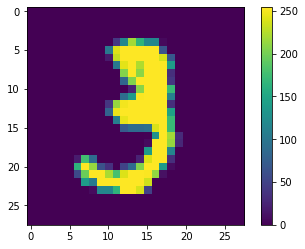

In [77]:
#Printing first image
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**STEP 4 : Buliding the model**

**ARCHITECTURE 1 : Input(784) + RELU(64) + RELU(32) + SOFTMAX(10)**

**(A) SETUP THE LAYERS:**

In [0]:
#Without Batch Normalization and Dropout layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**(B) COMPILE THE MODEL:**
1. Optimizer
2. Loss function
3. Evaluation Metrics

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**STEP 5 : TRAINING THE MODEL**

In [99]:
history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 6s 127us/sample - loss: 0.3288 - accuracy: 0.9062 - val_loss: 0.2083 - val_accuracy: 0.9375
Epoch 2/10
45000/45000 [==============================] - 5s 104us/sample - loss: 0.1429 - accuracy: 0.9581 - val_loss: 0.1384 - val_accuracy: 0.9577
Epoch 3/10
45000/45000 [==============================] - 5s 103us/sample - loss: 0.1068 - accuracy: 0.9678 - val_loss: 0.1290 - val_accuracy: 0.9610
Epoch 4/10
45000/45000 [==============================] - 5s 104us/sample - loss: 0.0812 - accuracy: 0.9761 - val_loss: 0.1254 - val_accuracy: 0.9641
Epoch 5/10
45000/45000 [==============================] - 5s 102us/sample - loss: 0.0683 - accuracy: 0.9787 - val_loss: 0.1156 - val_accuracy: 0.9658
Epoch 6/10
45000/45000 [==============================] - 5s 103us/sample - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.1092 - val_accuracy: 0.9682
Epoch 7/10
45000/45000 [==========================

**STEP 6 : EVALUATE ACCURACY**

In [100]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.0478 - accuracy: 0.9761

Test accuracy: 0.9761


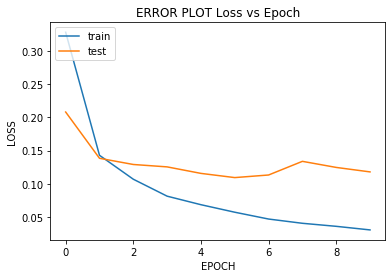

In [101]:
#https://keras.io/visualization/
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 3s 62us/sample - loss: 0.7212 - accuracy: 0.7788 - val_loss: 0.2775 - val_accuracy: 0.9203
Epoch 2/20
45000/45000 [==============================] - 2s 50us/sample - loss: 0.3837 - accuracy: 0.8865 - val_loss: 0.2175 - val_accuracy: 0.9355
Epoch 3/20
45000/45000 [==============================] - 2s 48us/sample - loss: 0.3315 - accuracy: 0.9007 - val_loss: 0.1911 - val_accuracy: 0.9444
Epoch 4/20
45000/45000 [==============================] - 2s 48us/sample - loss: 0.2957 - accuracy: 0.9109 - val_loss: 0.1722 - val_accuracy: 0.9493
Epoch 5/20
45000/45000 [==============================] - 2s 48us/sample - loss: 0.2749 - accuracy: 0.9182 - val_loss: 0.1643 - val_accuracy: 0.9511
Epoch 6/20
45000/45000 [==============================] - 2s 50us/sample - loss: 0.2662 - accuracy: 0.9194 - val_loss: 0.1543 - val_accuracy: 0.9547
Epoch 7/20
45000/45000 [==============================] 

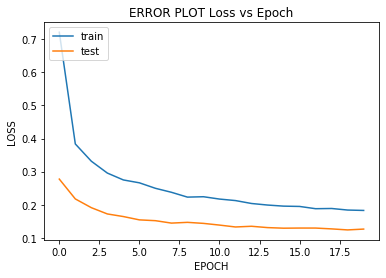

In [106]:
#Using Dropout=0.5 layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,batch_size=100,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 150us/sample - loss: 0.3225 - accuracy: 0.9057 - val_loss: 0.1818 - val_accuracy: 0.9442
Epoch 2/10
45000/45000 [==============================] - 6s 127us/sample - loss: 0.1521 - accuracy: 0.9526 - val_loss: 0.1437 - val_accuracy: 0.9555
Epoch 3/10
45000/45000 [==============================] - 6s 127us/sample - loss: 0.1181 - accuracy: 0.9640 - val_loss: 0.1297 - val_accuracy: 0.9617
Epoch 4/10
45000/45000 [==============================] - 6s 128us/sample - loss: 0.0998 - accuracy: 0.9690 - val_loss: 0.1210 - val_accuracy: 0.9647
Epoch 5/10
45000/45000 [==============================] - 6s 126us/sample - loss: 0.0873 - accuracy: 0.9717 - val_loss: 0.1154 - val_accuracy: 0.9663
Epoch 6/10
45000/45000 [==============================] - 6s 127us/sample - loss: 0.0798 - accuracy: 0.9756 - val_loss: 0.1060 - val_accuracy: 0.9701
Epoch 7/10
45000/45000 [==========================

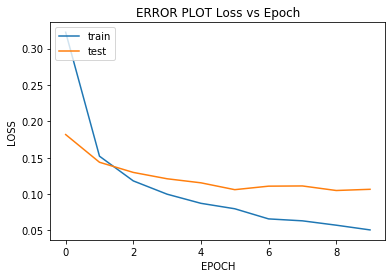

In [105]:
#Using Batch Normalization layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**ARCHITECTURE 2 :Input(784) + RELU(1024) + RELU (256) + RELU (32) + SOFTMAX(10)**

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 20s 450us/sample - loss: 0.2215 - accuracy: 0.9335 - val_loss: 0.1335 - val_accuracy: 0.9606
Epoch 2/10
45000/45000 [==============================] - 20s 445us/sample - loss: 0.0920 - accuracy: 0.9725 - val_loss: 0.1196 - val_accuracy: 0.9635
Epoch 3/10
45000/45000 [==============================] - 20s 438us/sample - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.1298 - val_accuracy: 0.9639
Epoch 4/10
45000/45000 [==============================] - 20s 444us/sample - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0976 - val_accuracy: 0.9728
Epoch 5/10
45000/45000 [==============================] - 20s 444us/sample - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.1145 - val_accuracy: 0.9712
Epoch 6/10
45000/45000 [==============================] - 20s 438us/sample - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.1197 - val_accuracy: 0.9731
Epoch 7/10
45000/45000 [====================

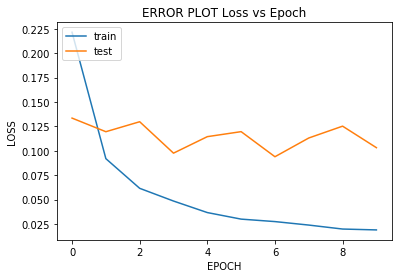

In [107]:
#Without any dropout and bach normalization

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 22s 478us/sample - loss: 0.3644 - accuracy: 0.8891 - val_loss: 0.1384 - val_accuracy: 0.9589
Epoch 2/10
45000/45000 [==============================] - 21s 465us/sample - loss: 0.1925 - accuracy: 0.9443 - val_loss: 0.1293 - val_accuracy: 0.9603
Epoch 3/10
45000/45000 [==============================] - 21s 457us/sample - loss: 0.1539 - accuracy: 0.9546 - val_loss: 0.1099 - val_accuracy: 0.9669
Epoch 4/10
45000/45000 [==============================] - 20s 451us/sample - loss: 0.1369 - accuracy: 0.9604 - val_loss: 0.1030 - val_accuracy: 0.9696
Epoch 5/10
45000/45000 [==============================] - 21s 464us/sample - loss: 0.1214 - accuracy: 0.9648 - val_loss: 0.1022 - val_accuracy: 0.9710
Epoch 6/10
45000/45000 [==============================] - 21s 458us/sample - loss: 0.1097 - accuracy: 0.9678 - val_loss: 0.0883 - val_accuracy: 0.9736
Epoch 7/10
45000/45000 [====================

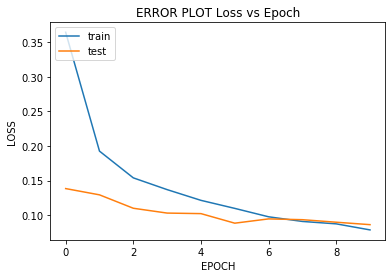

In [108]:
#With Drop out

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 22s 479us/sample - loss: 0.3333 - accuracy: 0.8977 - val_loss: 0.1419 - val_accuracy: 0.9577
Epoch 2/10
45000/45000 [==============================] - 21s 458us/sample - loss: 0.1734 - accuracy: 0.9454 - val_loss: 0.1142 - val_accuracy: 0.9653
Epoch 3/10
45000/45000 [==============================] - 21s 458us/sample - loss: 0.1370 - accuracy: 0.9577 - val_loss: 0.0930 - val_accuracy: 0.9715
Epoch 4/10
45000/45000 [==============================] - 21s 458us/sample - loss: 0.1175 - accuracy: 0.9627 - val_loss: 0.0903 - val_accuracy: 0.9720
Epoch 5/10
45000/45000 [==============================] - 20s 453us/sample - loss: 0.1022 - accuracy: 0.9671 - val_loss: 0.0843 - val_accuracy: 0.9746
Epoch 6/10
45000/45000 [==============================] - 21s 464us/sample - loss: 0.0950 - accuracy: 0.9712 - val_loss: 0.0905 - val_accuracy: 0.9729
Epoch 7/10
45000/45000 [====================

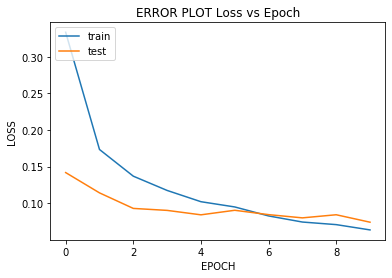

In [110]:
#With Drop out and Batch Normalization after two layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**ARCHITECTURE 3: :Input(784) + RELU(1024) + RELU(512) + RELU (256) + RELU (8) + RELU(16) SOFTMAX(10)**

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 30s 663us/sample - loss: 0.2943 - accuracy: 0.9138 - val_loss: 0.1975 - val_accuracy: 0.9485
Epoch 2/10
45000/45000 [==============================] - 30s 657us/sample - loss: 0.1113 - accuracy: 0.9683 - val_loss: 0.1235 - val_accuracy: 0.9658
Epoch 3/10
45000/45000 [==============================] - 29s 655us/sample - loss: 0.0758 - accuracy: 0.9790 - val_loss: 0.1169 - val_accuracy: 0.9690
Epoch 4/10
45000/45000 [==============================] - 29s 654us/sample - loss: 0.0636 - accuracy: 0.9823 - val_loss: 0.1054 - val_accuracy: 0.9707
Epoch 5/10
45000/45000 [==============================] - 30s 658us/sample - loss: 0.0494 - accuracy: 0.9864 - val_loss: 0.1332 - val_accuracy: 0.9642
Epoch 6/10
45000/45000 [==============================] - 29s 652us/sample - loss: 0.0412 - accuracy: 0.9886 - val_loss: 0.1165 - val_accuracy: 0.9708
Epoch 7/10
45000/45000 [====================

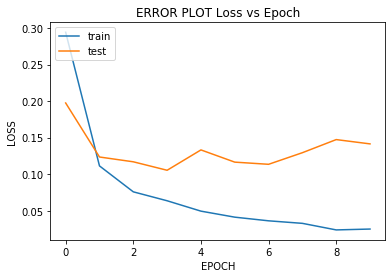

In [111]:
#Without any dropout and bach normalization

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 32s 703us/sample - loss: 0.5236 - accuracy: 0.8376 - val_loss: 0.1867 - val_accuracy: 0.9494
Epoch 2/10
45000/45000 [==============================] - 31s 695us/sample - loss: 0.2294 - accuracy: 0.9377 - val_loss: 0.1470 - val_accuracy: 0.9600
Epoch 3/10
45000/45000 [==============================] - 31s 689us/sample - loss: 0.1852 - accuracy: 0.9490 - val_loss: 0.1335 - val_accuracy: 0.9633
Epoch 4/10
45000/45000 [==============================] - 31s 699us/sample - loss: 0.1588 - accuracy: 0.9577 - val_loss: 0.1245 - val_accuracy: 0.9676
Epoch 5/10
45000/45000 [==============================] - 31s 695us/sample - loss: 0.1486 - accuracy: 0.9613 - val_loss: 0.1112 - val_accuracy: 0.9696
Epoch 6/10
45000/45000 [==============================] - 31s 692us/sample - loss: 0.1291 - accuracy: 0.9650 - val_loss: 0.1120 - val_accuracy: 0.9720
Epoch 7/10
45000/45000 [====================

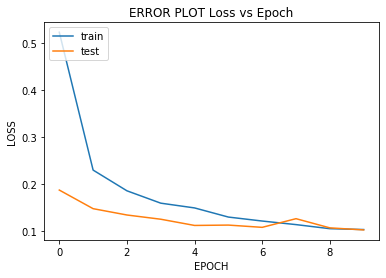

In [115]:
#With dropout

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 33s 741us/sample - loss: 0.6664 - accuracy: 0.7878 - val_loss: 0.1964 - val_accuracy: 0.9459
Epoch 2/10
45000/45000 [==============================] - 32s 714us/sample - loss: 0.2576 - accuracy: 0.9289 - val_loss: 0.1347 - val_accuracy: 0.9629
Epoch 3/10
45000/45000 [==============================] - 32s 714us/sample - loss: 0.1983 - accuracy: 0.9444 - val_loss: 0.1287 - val_accuracy: 0.9627
Epoch 4/10
45000/45000 [==============================] - 32s 711us/sample - loss: 0.1621 - accuracy: 0.9547 - val_loss: 0.1194 - val_accuracy: 0.9663
Epoch 5/10
45000/45000 [==============================] - 32s 712us/sample - loss: 0.1515 - accuracy: 0.9587 - val_loss: 0.1139 - val_accuracy: 0.9671
Epoch 6/10
45000/45000 [==============================] - 32s 719us/sample - loss: 0.1312 - accuracy: 0.9640 - val_loss: 0.1039 - val_accuracy: 0.9714
Epoch 7/10
45000/45000 [====================

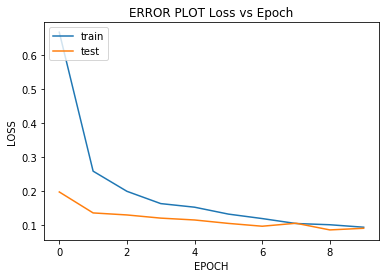

In [116]:
#With dropout and bach normalization

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_split=0.25)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**OBSERVATIONS:**

1. Without Batch Normalization and Drop out the training loss seems to be varying in the loss. It is incresing and decreasing randomly with number of epoches in all three architectures.
2. With out drop out layer the model is appearing as overfitiing the datapoints.
3. Batch Normalization in deeper layers is better than in initial layers.
4. A good dropout rate of 0.5  with 3 hidden layers is performing faster and giving better accuracy whereas the model with 5 hidden layers with dropout layer giving similar accuracy.